In [1]:
import pandas as pd
xl = pd.ExcelFile('distrib.xls')
df = xl.parse('Лист1')
df.head()

,No,La,LN,Ch,Un,Nl,Ls,C3,U3,Lo
0,2.638118,1.559936,5.796803,2.106319,2.388562,-2.891846,2.194869,2.883311,5.818445,70.021492
1,2.939677,1.106321,3.120341,5.040086,2.757530,-2.356624,0.835470,4.318595,5.773400,114.122601
2,2.036079,1.202140,23.299866,3.966322,3.585284,-2.740712,3.455526,12.033311,3.758904,102.786300
3,4.073466,1.192179,9.952675,3.882852,2.892209,0.038125,0.599163,17.623683,3.209204,9.499374
4,4.673323,1.839849,4.193463,2.971356,3.083651,2.085697,0.028275,6.324346,3.087344,39.115391


In [2]:
X = df[['Ch']].values
import matplotlib.pyplot as plt
plt.hist(X,bins=30)
plt.show()

<Figure size 640x480 with 1 Axes>

It is hard to judge if it is normal. Notice that we don't have any values less than 0.

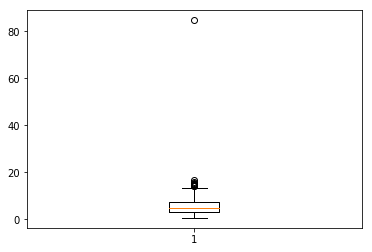

In [3]:
plt.boxplot(X)
plt.show()

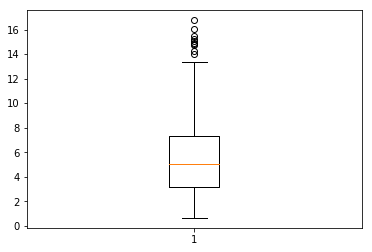

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


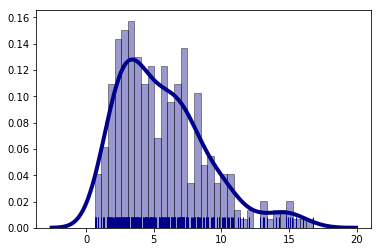

In [4]:
X = X[X<20] # removing the outlier
plt.boxplot(X)
plt.show()
import seaborn as sns
sns.distplot(X, hist=True, kde=True, rug = True,
             bins=33, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

In [5]:
from scipy import stats
statistic, p_value = stats.normaltest(X)
alpha = 0.01 # critical level
print("p-value = {:g}, a 2-sided chi squared probability for the hypothesis test.".format(p_value))

print('Null hypothesis: x comes from a normal distribution.')
if p_value < alpha:  # null hypothesis: X comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p-value = 1.95962e-09, a 2-sided chi squared probability for the hypothesis test.
Null hypothesis: x comes from a normal distribution.
The null hypothesis can be rejected


Therefore the data is in favour of the hypothesis that $X$ is not normally distributed.

$\alpha$ is the probabiliy of mistake

$$\alpha = P_{H_0}(H_1)$$

The smallest p-value is the more likely alternative will be true.

A random variable whose distribution does not have $E[(1+Y)^2]=1+2E[Y]^2+E[Y^2]$ can't be Chi-Square distributed.

In [6]:
import numpy as np
np.mean((1+X)**2), 1+2*np.mean(X)**2+np.mean(X**2) # ???

(55.091702690615485, 107.93168634969572)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


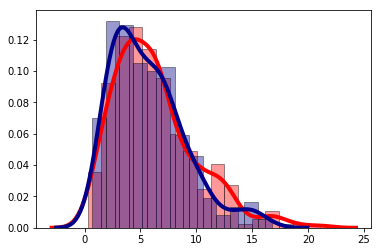

In [11]:
Xs6 = np.random.chisquare(6,300)
sns.distplot(Xs6, kde=True, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(X, kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

In [8]:
# run linear regr for X = a*Xs + b ??

Computes the Kolmogorov-Smirnov statistic on 2 samples.

This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.

In [9]:
Xs5 = np.random.chisquare(5,3000)
Xs6 = np.random.chisquare(6,3000)
Xs7 = np.random.chisquare(7,3000)

In [10]:
d, p_value5 = stats.ks_2samp(X, Xs5)
d, p_value6 = stats.ks_2samp(X, Xs6)
d, p_value7 = stats.ks_2samp(X, Xs7)
p_value5, p_value6, p_value7

(0.00019811685429657635, 0.19922669342353944, 1.8430098693989283e-07)

According to Kolmogorov-Smirnov test our variable has Chi-square distribution on the level $\alpha = 15\%$.